In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
cleaned_data = pd.read_csv("cleaned_data.csv", index_col = 0)
cases = pd.read_csv("cases.csv", index_col = 0)

### Support Vector Machine

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In this case, we will be using [Support vector regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) (SVR) to predict the total cases and we will use the Mean absolute error (MAE) to judge the accuracy.

We will do feature scaling as real-world dataset contains features that vary in magnitudes, units, and range.

Then, we split into train and test set.

In [3]:
# import train test split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# scaling data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(cleaned_data)
y = sc_y.fit_transform(cases)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn import svm

# preparing the cross-validation procedure
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

# creating model
svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1e3)
svr_poly = svm.SVR(kernel='poly', C=1e3, degree=2)

# evaluate model
scores_rbf = cross_val_score(svr_rbf, X_train, y_train.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
scores_lin = cross_val_score(svr_lin, X_train, y_train.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
scores_poly = cross_val_score(svr_poly, X_train, y_train.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)


scores_rbf1 = cross_val_score(svr_rbf, X_train, y_train.ravel(), scoring='neg_mean_squared_error', cv=cv, n_jobs=1)
scores_lin1 = cross_val_score(svr_lin, X_train, y_train.ravel(), scoring='neg_mean_squared_error', cv=cv, n_jobs=1)
scores_poly1 = cross_val_score(svr_poly, X_train, y_train.ravel(), scoring='neg_mean_squared_error', cv=cv, n_jobs=1)

# mean of mae and mse is the positive value
print("Mean of MAE:")
print("SVR_rbf: ", np.mean(scores_rbf)*-1)
print("SVR_lin: ", np.mean(scores_lin)*-1)
print("SVR_poly: ", np.mean(scores_poly)*-1)

print("Mean of MSE:")
print("SVR_rbf: ", np.mean(scores_rbf1)*-1)
print("SVR_lin: ", np.mean(scores_lin1)*-1)
print("SVR_poly: ", np.mean(scores_poly1)*-1)

Mean of MAE:
SVR_rbf:  0.8363004666243592
SVR_lin:  0.4184940496181734
SVR_poly:  0.4445718815443479
Mean of MSE:
SVR_rbf:  1.7856255384350674
SVR_lin:  0.9958553174463951
SVR_poly:  1.038120913184539


Comparing the MAE and MSE of the different models after k-fold cross validation, the **linear kernel** seems to be the best model.

In [5]:
svr_lin.fit(X_train, y_train.ravel())
cases_pred = svr_lin.predict(X_test)
cases_pred = sc_y.inverse_transform(cases_pred.reshape(-1,1)) 

In [6]:
y_test = sc_y.inverse_transform(y_test)
df1 = pd.DataFrame(y_test, columns = ['total_cases'])

# rounding up to nearest whole no.
cases_pred = np.rint(cases_pred)

df = pd.DataFrame(cases_pred, columns = ['pred_total_cases'])

# combining total cases test and the predicted total cases into a dataframe
all_data = pd.concat([df1, df], axis = 1)
all_data.head()

,total_cases,pred_total_cases
0,24.0,24.0
1,24.0,17.0
2,7.0,22.0
3,10.0,6.0
4,29.0,18.0


In [7]:
print("MAE of model on test data: ", metrics.mean_absolute_error(y_test, cases_pred))

MAE of model on test data:  15.982876712328768


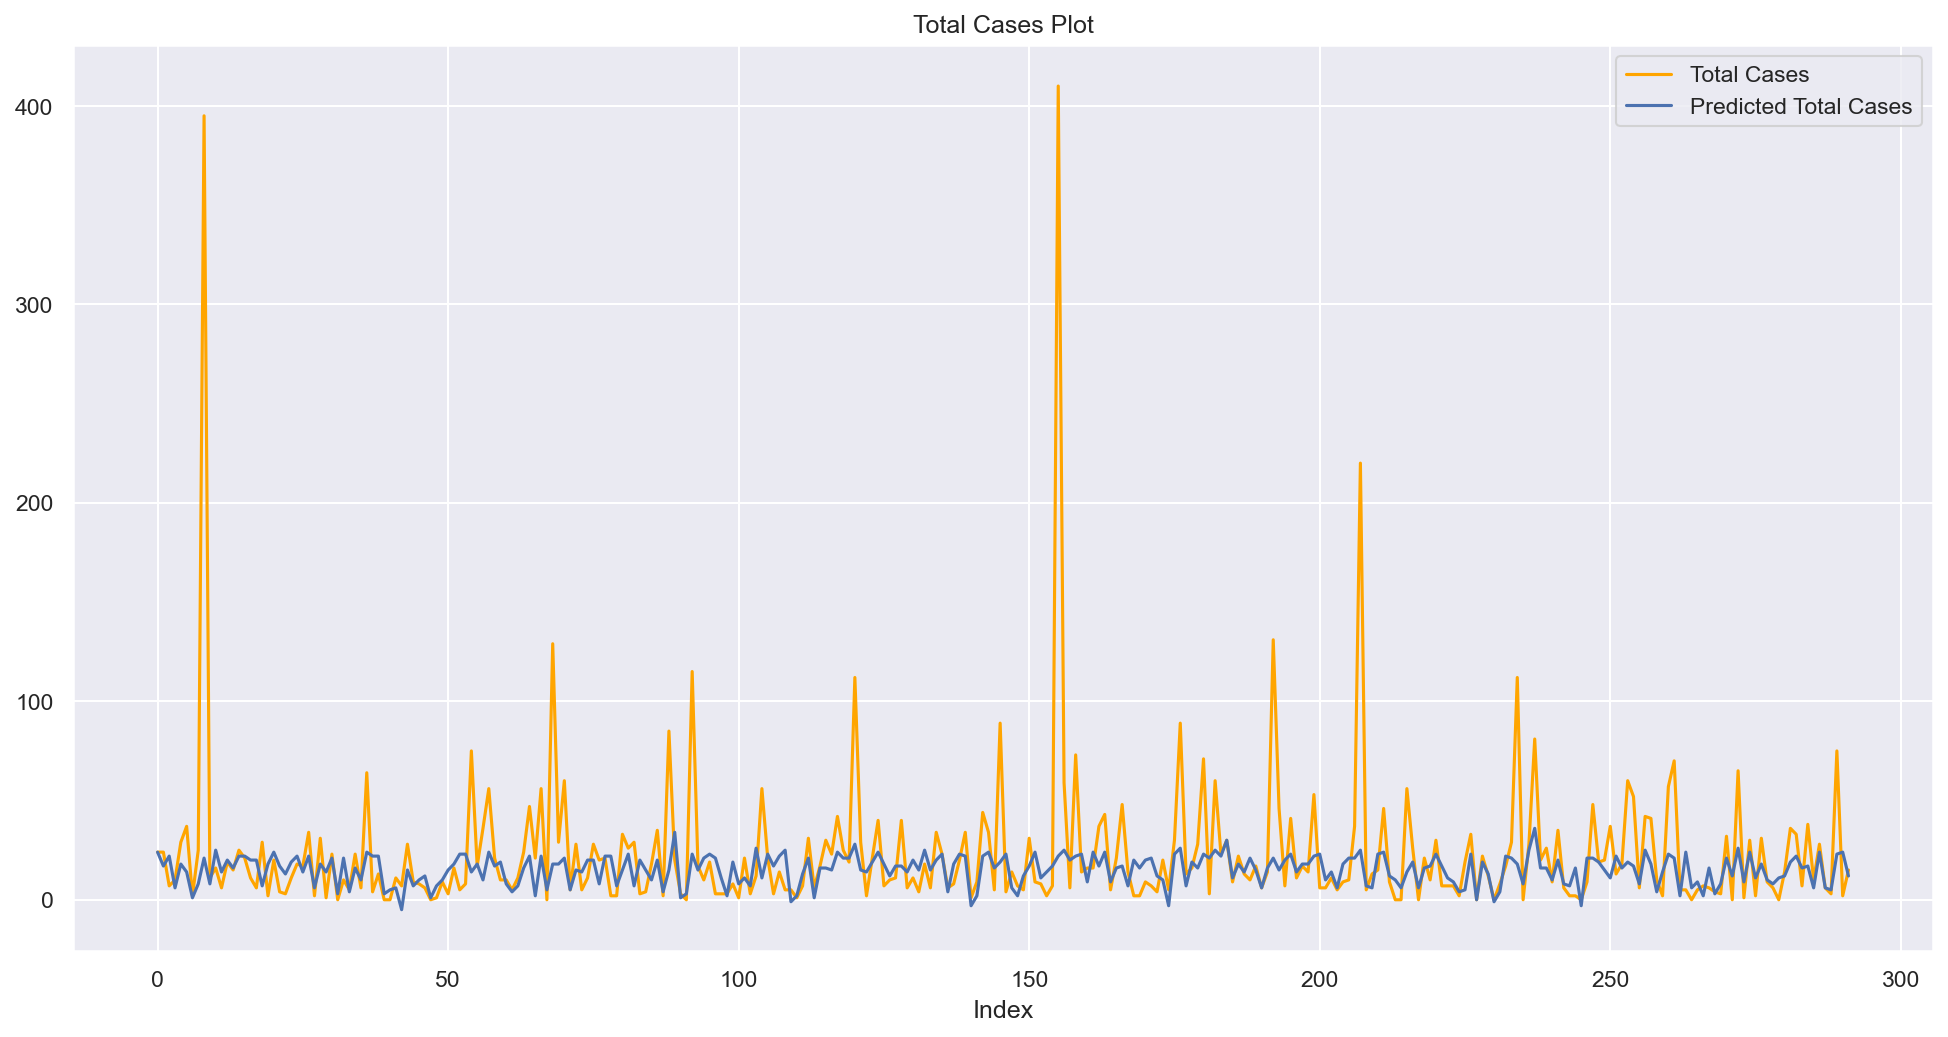

In [8]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
all_data['total_cases'].plot(label='Total Cases', color='orange')
all_data['pred_total_cases'].plot(label='Predicted Total Cases')
  
# adding title to the plot
plt.title('Total Cases Plot')
  
# adding Label to the x-axis
plt.xlabel('Index')
  
# adding legend to the curve
plt.legend()